In [1]:
import seaborn as sns
from copy import deepcopy
import pandas as pd
from tqdm import tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import product
from modules import downcast_dtypes, get_split_points, get_train_val, \
                    add_shop_last_stat, add_item_last_stat, fit_and_eval, fill_with_0_target

In [3]:
all_data = fill_with_0_target(downcast_dtypes(pd.read_csv('sales_train.csv')))

In [143]:
for train, val in get_train_val(all_data, *get_split_points(all_data)):
    extra_items = set(val.shop_id) - set(train.shop_id)
    print(extra_items)

set()
set()
set()
set()
{36}


In [94]:
for train, val in get_train_val(all_data, *get_split_points(all_data)):
    extra_items = set(val.item_id) - set(train.item_id)
#     print(val.target.mean())
    print(val.loc[val['item_id'].isin(extra_items)].target.mean(), sum(val['item_id'].isin(extra_items)) / len(val))
#     print(sum(val['item_id'].isin(extra_items)) / len(val))

0.5867907 0.04792944785276074
0.35414314 0.03869998121360135
0.43389058 0.05520751761942052
0.79793626 0.05939036381514257
0.5400478 0.08775170884906706


In [88]:
gb

,shop_id,item_id,date_block_num,target
2,0,32,0,6.0
4,0,33,0,3.0
6,0,35,0,1.0
11,0,43,0,1.0
13,0,51,0,2.0
...,...,...,...,...
1608998,59,22087,33,6.0
1609030,59,22088,33,2.0
1609047,59,22091,33,1.0
1609073,59,22100,33,1.0


/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_block_num', ylabel='target'>

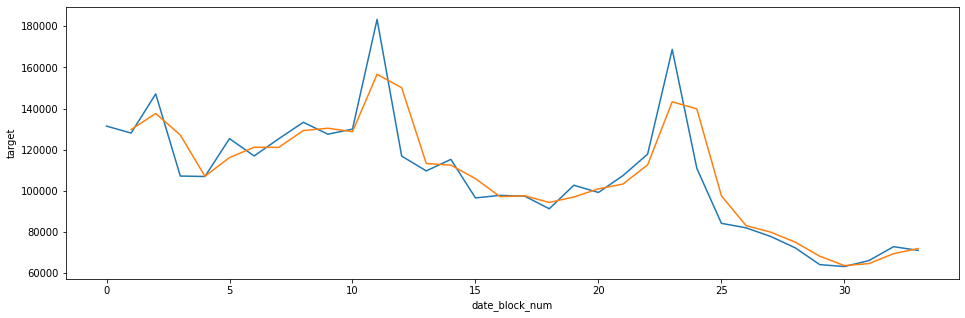

In [99]:
plt.figure(figsize=(16, 5))
target_over_months = gb.groupby(['date_block_num'],as_index=False).agg({'target': 'sum'})
sns.lineplot(target_over_months['date_block_num'], target_over_months['target'])
sns.lineplot(target_over_months['date_block_num'], target_over_months['target'].rolling(2).mean())

/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_block_num', ylabel='target'>

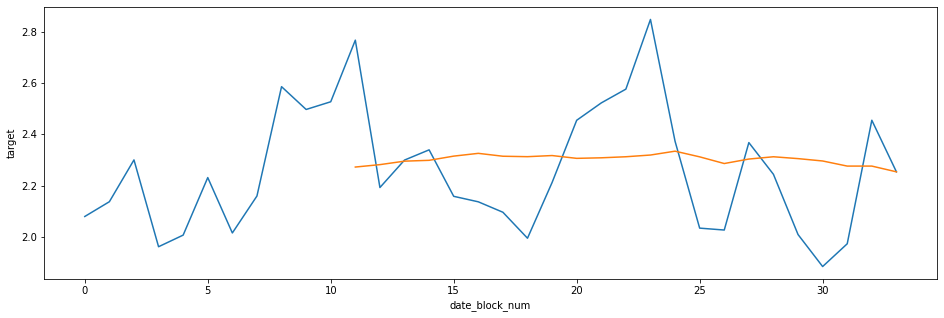

In [104]:
plt.figure(figsize=(16, 5))
target_over_months = gb.groupby(['date_block_num'],as_index=False).agg({'target': 'mean'})
sns.lineplot(target_over_months['date_block_num'], target_over_months['target'])
sns.lineplot(target_over_months['date_block_num'], target_over_months['target'].rolling(12).mean())

относительный рост к этому месяцу год назад чтобы зацепить сезонный рост

среднее за 

In [ ]:
sns.lineplot(gb.groupby(['date_block_num'].sum('target')))

In [86]:
len(val), len(extra_items)

(238172, 475)

In [84]:
all_data.target.mean()

0.33427307

In [82]:
len(extra_items)

475

In [81]:
[0.8326187279090691, 0.7602194433492344, 0.8407572275582069, 0.9514555348199423, 0.9867464877015985]

[0.8326187279090691,
 0.7602194433492344,
 0.8407572275582069,
 0.9514555348199423,
 0.9867464877015985]

In [59]:
all_data = downcast_dtypes(pd.read_csv('sales_train.csv'))

In [63]:
index_cols = ['shop_id', 'item_id', 'date_block_num']
gb = all_data.groupby(index_cols,as_index=False).agg({'item_cnt_day': 'sum'}) \
                                          .rename(columns={'item_cnt_day': 'target'})

In [68]:
gb.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

In [72]:
# vals = []
items_to_del = set()
for train, val in get_train_val(gb, *get_split_points(gb)):
    extra_items = set(val.item_id) - set(train.item_id)
    print(val.loc[val['item_id'].isin(extra_items)].target.mean())
#     print(sum(val['item_id'].isin(extra_items)) / len(val))

3.1794355
2.448868
2.6905758
4.913229
3.7485886


In [78]:
1578 in extra_items

True

In [74]:
val.loc[val['item_id'].isin(extra_items)]

,shop_id,item_id,date_block_num,target
8949,2,1578,33,4.0
8950,2,1579,33,1.0
8951,2,1583,33,9.0
8952,2,1586,33,1.0
10764,2,3034,33,1.0
...,...,...,...,...
1605167,59,17774,33,1.0
1605168,59,17775,33,6.0
1606576,59,19144,33,1.0
1607007,59,19655,33,4.0


In [65]:
val.loc[val['item_id'].isin(extra_items)]

,shop_id,item_id,date_block_num,target


In [57]:
val

,date_block_num,target,prev_item_sales,prev_shop_item_sales
10378773,31,0.0,1.0,0.0
10378774,31,0.0,1.0,0.0
10378775,31,0.0,2.0,0.0
10378776,31,0.0,1.0,0.0
10378777,31,0.0,4.0,0.0
...,...,...,...,...
10607657,32,0.0,39.0,0.0
10607658,32,0.0,22.0,0.0
10607659,32,0.0,1.0,0.0
10607660,32,1.0,0.0,0.0


In [ ]:
[0.8326187279090691, 0.7602194433492344, 0.8407572275582069, 0.9514555348199423, 0.9867464877015985]

In [6]:
len(items_to_del), len(extra_items)

(1515, 475)

In [10]:
all_data.head()

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0


In [17]:
set(val.shop_id) - set(train.shop_id)

{36}

In [20]:
sum(val['shop_id'] == 36) / len(val)

0.005718129835183316

In [22]:
extra_items = set(val.item_id) - set(train.item_id)

In [25]:
sum(val['item_id'].isin(extra_items)) / len(val)

0.12555592928953171

<AxesSubplot:xlabel='item_id', ylabel='Count'>

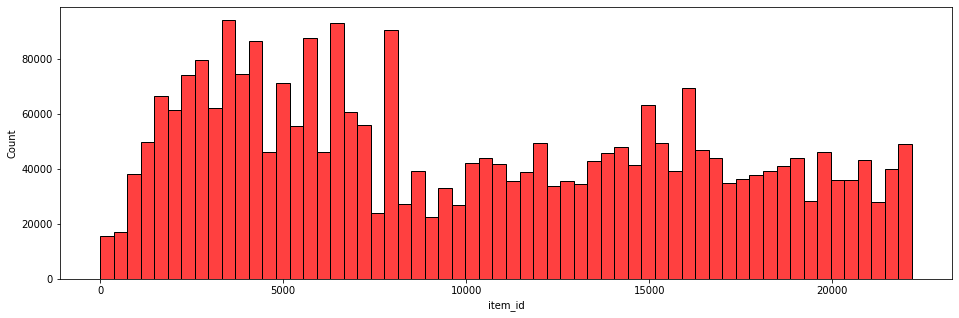

In [16]:
plt.figure(figsize=(16, 5))
sns.histplot(train.item_id, color='r', bins=60)

<AxesSubplot:xlabel='item_id', ylabel='Count'>

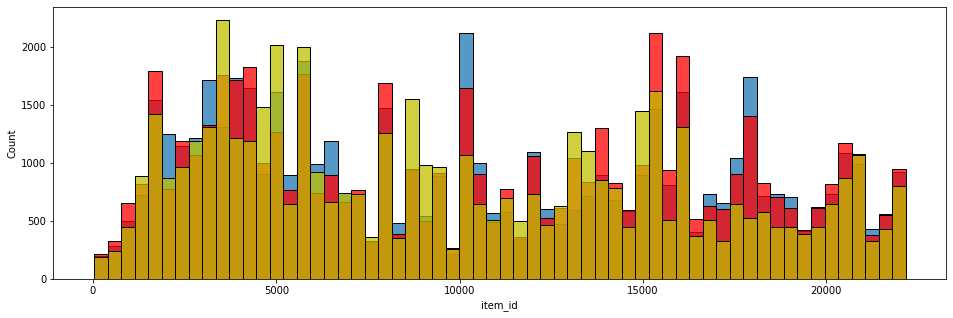

In [14]:
plt.figure(figsize=(16, 5))
sns.histplot(vals[0].item_id, bins=60)
sns.histplot(vals[1].item_id, color='r', bins=60)
sns.histplot(vals[3].item_id, color='y', bins=60)

In [40]:
test = pd.read_csv('test.csv')
test["date_block_num"] = 34
test.drop('ID', axis=1, inplace=True)
test.head()

,shop_id,item_id,date_block_num
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34


In [42]:
all_data = pd.concat([all_data, test])

In [44]:
all_data

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0
...,...,...,...,...
214195,45,18454,34,NaN
214196,45,16188,34,NaN
214197,45,15757,34,NaN
214198,45,19648,34,NaN


In [12]:
i = 0
for train, val in get_train_val(all_data, *get_split_points(all_data)):
    print(train.date_block_num.min(), train.date_block_num.max(), val.date_block_num.min(), val.date_block_num.max())

0 28 29 29
0 29 30 30
0 30 31 31
0 31 32 32
0 32 33 33


In [4]:
all_data['target'] = all_data['target'].clip(0., 20.)

In [5]:
all_data = add_item_last_stat(all_data)

In [6]:
all_data = add_shop_last_stat(all_data)

In [8]:
all_data.loc[all_data['date_block_num']>0]

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales
365175,0,12,1,0.0,NaN,5411.0
365176,0,27,1,0.0,7.0,5411.0
365177,0,28,1,0.0,8.0,5411.0
365178,0,30,1,20.0,NaN,5411.0
365179,0,31,1,11.0,NaN,5411.0
...,...,...,...,...,...,...
10913845,59,22162,33,0.0,7.0,914.0
10913846,59,22163,33,0.0,20.0,914.0
10913847,59,22164,33,0.0,9.0,914.0
10913848,59,22166,33,0.0,5.0,914.0


In [29]:
all_data.prev_item_sales.isna().astype(int)

0           1
1           1
2           1
3           1
4           1
           ..
10913845    0
10913846    0
10913847    0
10913848    0
10913849    0
Name: prev_item_sales, Length: 10913850, dtype: int64

In [15]:
all_data['is_new_item'] = all_data.prev_item_sales.isna().astype(int)

In [31]:
all_data['target'] = all_data['target'].clip(0., 20.)

In [142]:
all_data.isna().sum(axis=1).value_counts()

0    8437839
2    2360812
1     115199
dtype: int64

In [148]:
all_data.isna().sum(axis=1).value_counts()

0    8437839
1    2082298
2     393713
dtype: int64

In [25]:
all_data.loc[(all_data['date_block_num'] > 0) & (all_data.isna().sum(axis=1) > 0)]

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales
365175,0,12,1,0.0,NaN,5578.0
365178,0,30,1,20.0,NaN,5578.0
365179,0,31,1,11.0,NaN,5578.0
365184,0,36,1,1.0,NaN,5578.0
365215,0,97,1,1.0,NaN,5578.0
...,...,...,...,...,...,...
10913817,59,22006,33,0.0,NaN,914.0
10913820,59,22020,33,0.0,NaN,914.0
10913827,59,22072,33,0.0,NaN,914.0
10913842,59,22145,33,0.0,NaN,914.0


In [40]:
gb_block_num = all_data.loc[all_data['date_block_num'] == 1]\
                    .groupby('shop_id').target.mean()
# gb_block_num.rename(columns={'target': 'kek'}, inplace=True)

In [41]:
gb_block_num

shop_id
0     0.712537
1     0.405730
2     0.059868
3     0.097698
4     0.244736
5     0.107370
6     0.460823
7     0.305093
8     0.141528
10    0.124388
12    0.129407
13    0.122184
14    0.212292
15    0.318683
16    0.315010
18    0.392875
19    0.338394
21    0.223188
22    0.277057
23    0.233105
24    0.212782
25    0.898261
26    0.308031
27    0.535015
28    0.606023
29    0.331170
30    0.329334
31    1.208007
32    0.182909
35    0.267018
37    0.267997
38    0.200171
41    0.226249
42    0.451028
43    0.233717
44    0.223555
45    0.185357
46    0.315377
47    0.221841
50    0.369368
51    0.264202
52    0.211068
53    0.230167
54    0.873164
56    0.320274
59    0.228820
Name: target, dtype: float32

In [9]:
nan_idcs = all_data.isna().sum(axis=1) > 0

In [19]:
all_data['shop_id']

0            0
1            0
2            0
3            0
4            0
            ..
10913845    59
10913846    59
10913847    59
10913848    59
10913849    59
Name: shop_id, Length: 10913850, dtype: int32

In [42]:
all_data['shop_id'].map(gb_block_num)


0           0.712537
1           0.712537
2           0.712537
3           0.712537
4           0.712537
              ...   
10913845    0.228820
10913846    0.228820
10913847    0.228820
10913848    0.228820
10913849    0.228820
Name: shop_id, Length: 10913850, dtype: float32

In [51]:
kek = all_data.loc[(all_data['date_block_num'] == 2) & nan_idcs]
all_data.loc[(all_data['date_block_num'] == 2) & nan_idcs, 'prev_item_sales'] = all_data['shop_id'].map(gb_block_num)

In [10]:
all_data.loc[(all_data['date_block_num'] == 2) & nan_idcs]

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales
740912,2,37,2,0.0,NaN,488.0
740916,2,43,2,0.0,NaN,488.0
740934,2,68,2,0.0,NaN,488.0
740940,2,86,2,0.0,NaN,488.0
740944,2,94,2,0.0,NaN,488.0
...,...,...,...,...,...,...
1122779,59,22132,2,0.0,NaN,1897.0
1122782,59,22136,2,0.0,NaN,1897.0
1122785,59,22146,2,0.0,NaN,1897.0
1122790,59,22152,2,0.0,NaN,1897.0


In [53]:
all_data.loc[(all_data['date_block_num'] == 3) & nan_idcs]

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales
1122825,2,65,3,0.0,NaN,753.0
1122826,2,66,3,0.0,NaN,753.0
1122830,2,82,3,0.0,NaN,753.0
1122841,2,105,3,0.0,NaN,753.0
1122864,2,253,3,0.0,NaN,753.0
...,...,...,...,...,...,...
1497445,59,22115,3,0.0,NaN,2028.0
1497447,59,22120,3,0.0,NaN,2028.0
1497448,59,22124,3,0.0,NaN,2028.0
1497449,59,22128,3,0.0,NaN,2028.0


In [14]:
nan_idcs = all_data.isna().sum(axis=1) > 0
for date_block_num in range(1, 34):
    gb_block_num = all_data.loc[all_data['date_block_num'] == (date_block_num - 1)]\
                    .groupby('shop_id')\
                    .target.mean()
    all_data.loc[(all_data['date_block_num'] == date_block_num) & nan_idcs, 'prev_item_sales'] = all_data['shop_id'].map(gb_block_num)

In [13]:
all_data.loc[all_data['date_block_num'] > 0]

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales
365175,0,12,1,0.0,NaN,5578.0
365176,0,27,1,0.0,7.0,5578.0
365177,0,28,1,0.0,8.0,5578.0
365178,0,30,1,20.0,NaN,5578.0
365179,0,31,1,11.0,NaN,5578.0
...,...,...,...,...,...,...
10913845,59,22162,33,0.0,7.0,914.0
10913846,59,22163,33,0.0,20.0,914.0
10913847,59,22164,33,0.0,9.0,914.0
10913848,59,22166,33,0.0,5.0,914.0


In [15]:
all_data.loc[all_data['date_block_num'] > 0]

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales
365175,0,12,1,0.0,0.66679,5578.0
365176,0,27,1,0.0,7.00000,5578.0
365177,0,28,1,0.0,8.00000,5578.0
365178,0,30,1,20.0,0.66679,5578.0
365179,0,31,1,11.0,0.66679,5578.0
...,...,...,...,...,...,...
10913845,59,22162,33,0.0,7.00000,914.0
10913846,59,22163,33,0.0,20.00000,914.0
10913847,59,22164,33,0.0,9.00000,914.0
10913848,59,22166,33,0.0,5.00000,914.0


In [149]:
all_data2 = all_data.fillna(0.).loc[(all_data['date_block_num'] > 0) & (all_data['date_block_num'] < 34)]

In [20]:
# train_set = all_data.loc[~all_data['item_id'].isin(items_to_del)]

In [49]:
test = all_data.loc[all_data['date_block_num'] == 34]

In [50]:
test

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_item_sales
10913850,5,5037,34,NaN,25.0,0.0
10913851,5,5320,34,NaN,NaN,NaN
10913852,5,5233,34,NaN,42.0,1.0
10913853,5,5232,34,NaN,28.0,0.0
10913854,5,5268,34,NaN,NaN,NaN
...,...,...,...,...,...,...
11128045,45,18454,34,NaN,2.0,1.0
11128046,45,16188,34,NaN,1.0,0.0
11128047,45,15757,34,NaN,5.0,0.0
11128048,45,19648,34,NaN,2.0,0.0


In [7]:
train_exp_on_prev = all_data.drop(['shop_id', 'item_id'], axis=1).fillna(0.).loc[(all_data['date_block_num'] > 0) & (all_data['date_block_num'] < 34)]

In [10]:
train_exp_on_prev.head()

,date_block_num,target,prev_item_sales,prev_shop_sales
365175,1,0.0,0.0,5411.0
365176,1,0.0,7.0,5411.0
365177,1,0.0,8.0,5411.0
365178,1,20.0,0.0,5411.0
365179,1,11.0,0.0,5411.0


In [53]:
train_exp_on_prev['target'] = train_exp_on_prev['target'].clip(0., 20.)

In [54]:
train_exp_on_prev.date_block_num.min(), train_exp_on_prev.date_block_num.max()

(1, 33)

In [19]:
from catboost import CatBoostRegressor

# model = CatBoostRegressor()
# model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=5, silent=True)

In [24]:
model = fit_and_eval(train_exp_on_prev, algo='cbr')

Model:  cbr
feat importancies:  [25.76896162 74.23103838]
rmse on val:  [1.4700815653966708, 0.9513156828396381, 1.4441926153142022, 6.814705821022131, 5.18565885324185]


In [25]:
model = fit_and_eval(train_exp_on_prev, algo='rfr')

Model:  rfr
feat importancies:  [0.21999782 0.78000218]
rmse on val:  [2.9081439425810145, 1.538291018043374, 1.7067661981226707, 6.9065200425977356, 5.196803059635622]


In [55]:
print('clipped by 20')
model = fit_and_eval(train_exp_on_prev, algo='cbr')

clipped by 20
Model:  cbr
feat importancies:  [26.1887155 73.8112845]
rmse on val:  [0.8326187279090691, 0.7602194433492344, 0.8407572275582069, 0.9514555348199423, 0.9867464877015985]


In [151]:
print('correct shop stat')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

correct shop stat
Model:  cbr
feat importancies:  [65.71838079 34.28161921]
rmse on val:  [0.8934673463719276, 0.8434086037849533, 0.9233009897194797, 1.0151835513598986, 1.0318927186419433]


In [18]:
print('fill new items nan with shop mean sales')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

fill new items nan with shop mean sales
Model:  cbr
feat importancies:  [64.02046945 35.97953055]
rmse on val:  [0.9039894587594428, 0.8375723317810004, 0.9295405991115131, 1.0172810136382273, 1.0440630475254793]


In [35]:
print('new column is new item')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

new column is new item
Model:  cbr
feat importancies:  [65.53567877 34.13253484  0.33178639]
rmse on val:  [0.8935518066832603, 0.8432110377849991, 0.9237432857115001, 1.014559210167271, 1.0323045355432492]


In [17]:
print('new column is new item & clipped in the beginning')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

new column is new item & clipped in the beginning
Model:  cbr
feat importancies:  [63.61033711 35.61791032  0.77175257]
rmse on val:  [0.8982538195209541, 0.8453305235080384, 0.9169218184580411, 1.0157715914341514, 1.0264247548524104]


In [8]:
print('new column is new item & clipped in the beginning & new preds on new items')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

new column is new item & clipped in the beginning & new preds on new items


AttributeError: 'DataFrame' object has no attribute 'item_id'

In [117]:
all_data = all_data.reset_index().drop('index', axis=1)

In [120]:
all_data.where(all_data['item_id'].isin([18454, 5037])).dropna().index

Int64Index([ 6785185,  6791256,  6797327,  6803398,  6809469,  6815540,
             6821611,  6827682,  6833753,  6839824,
            ...
            10522886, 10526124, 10528299, 10531537, 10533712, 10536950,
            10539125, 10542363, 10544538, 10547776],
           dtype='int64', length=1150)

In [24]:
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor


score_extra_items = []
mean_extra_items = []
for train, val in get_train_val(all_data, *get_split_points(all_data)):
    extra_items = set(val.item_id) - set(train.item_id)
#     extra_idcs = val.where(val['item_id'].isin(extra_items)).dropna().index
    X_train = np.array(train.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    X_val = np.array(val.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    y_train, y_val = np.array(train['target']), np.array(val['target'])
    model = CatBoostRegressor()
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=5, silent=True)
    extra_data = val.loc[val['item_id'].isin(extra_items)]
    X_extra = np.array(extra_data.drop(['date_block_num', 'target', 'item_id', 'shop_id'],
                                       axis=1))
#     print(mse(model.predict(X_extra), np.array(extra_data['target']), squared=False), \
#           mse(model.predict(X_val), y_val, squared=False))
    extra_mean = extra_data['target'].mean()
    print(mse(model.predict(X_extra), np.array(extra_data['target']), squared=False), \
          mse(np.ones(len(y_val)) * extra_mean, y_val, squared=False),
          'real mean: ', extra_mean, 'pred mean: ', model.predict(X_extra).mean())
#     print(score_extra_items

1.9926277506139198 1.0939840510470518 real mean:  0.53506976 pred mean:  0.1764113982317384
1.3570709427065781 0.993926906333482 real mean:  0.33630615 pred mean:  0.16842287784872334
1.6104848053130034 1.0691765539241065 real mean:  0.4061128 pred mean:  0.1655418142093297
2.6152676763231995 1.2194365710323034 real mean:  0.6572463 pred mean:  0.17362954857636598
1.989472502852651 1.1546499145826081 real mean:  0.4644019 pred mean:  0.17950424352617758


In [26]:
extra_idcs = val.where(val['item_id'].isin(extra_items)).dropna().index

In [31]:
val.index.min()

10675678

In [34]:
preds = model.predict(X_val)

In [36]:
preds[23:30]

array([0.10808788, 0.10808788, 0.10808788, 0.10808788, 0.02460931,
       0.10808788, 0.02460931])

In [43]:
preds[23:30]

array([0.40808788, 0.40808788, 0.40808788, 0.40808788, 0.02460931,
       0.10808788, 0.02460931])

In [42]:
preds[idces] += 0.3

In [37]:
idces = val.loc[val['item_id'].isin(extra_items)].index - val.index.min()

In [38]:
idces

Int64Index([    23,     24,     25,     26,     32,     35,     36,     37,
                38,     39,
            ...
            238118, 238121, 238122, 238127, 238128, 238129, 238137, 238138,
            238139, 238166],
           dtype='int64', length=20900)

In [25]:
0.6572463 - 0.165541, 0.3363 - 0.168

(0.49170529999999996, 0.16829999999999998)

In [127]:
X_extra.mean()

0.0

In [128]:
extra_data['target'].mean(), model.predict(X_extra).mean()

(0.53506976, 0.2252269858056626)

In [123]:
from sklearn.metrics import mean_squared_error as mse

print(mse(model.predict(X_extra), np.array(extra_data['target']), squared=False), \
          mse(model.predict(X_val), y_val, squared=False))

2.001262534129661 0.8326187279090691


In [130]:
extra_data = val.loc[~val['item_id'].isin(extra_items)]
X_extra = np.array(extra_data.drop(['date_block_num', 'target', 'item_id', 'shop_id'],
                                       axis=1))
mse(model.predict(X_extra), np.array(extra_data['target']))

0.5265303362961813

In [16]:
preds = model.predict(np.array(test[['prev_item_sales', 'prev_shop_item_sales']]))

In [17]:
preds

array([0.29863175, 0.18341314, 0.59697035, ..., 0.14074628, 0.14074628,
       0.14074628])

In [19]:
test_pred = pd.read_csv('test.csv')
submission = test_pred.loc[:,['ID']]

In [21]:
submission['item_cnt_month'] = preds
submission

,ID,item_cnt_month
0,0,0.298632
1,1,0.183413
2,2,0.596970
3,3,0.298632
4,4,0.183413
...,...,...
214195,214195,0.324815
214196,214196,0.140746
214197,214197,0.140746
214198,214198,0.140746


In [22]:
submission.to_csv('submission.csv', index=False)

In [22]:
val_mean = []
for train, val in get_train_val(train_exp_on_prev, *get_split_points(train_exp_on_prev)):
    print(train.target.mean(), val.target.mean())
    val_mean.append(val.target.mean())

0.33737293 0.28585568
0.33598346 0.27605957
0.33241442 0.3080089
0.33376715 0.33314124
0.33582792 0.298339


/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

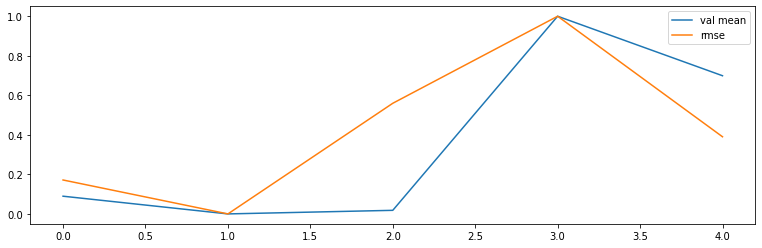

In [35]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

rmse = [1.56275339500324, 1.0974260908473958, 1.1916816712222107, 6.290556245882512, 4.727732499591017]
plt.figure(figsize=(13, 4))
sns.lineplot(np.arange(5), np.squeeze(sc.fit_transform(np.expand_dims(rmse, axis=1))), legend='brief', label='val mean')
sns.lineplot(np.arange(5), np.squeeze(sc.fit_transform(np.expand_dims(val_mean, axis=1))), legend='brief', label='rmse')

In [29]:
np.expand_dims(rmse, axis=1)

array([[1.5627534 ],
       [1.09742609],
       [1.19168167],
       [6.29055625],
       [4.7277325 ]])

In [33]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

np.squeeze(sc.fit_transform(np.expand_dims(rmse, axis=1)))

array([0.0896044 , 0.        , 0.01815005, 1.        , 0.69905939])

In [34]:
sc = MinMaxScaler()
np.squeeze(sc.fit_transform(np.expand_dims(val_mean, axis=1)))

array([0.17161608, 0.        , 0.5597129 , 1.        , 0.39030838],
      dtype=float32)